In [41]:
from data_generator import ssp_data
import pickle
import matplotlib.pyplot as plt
# from torch.utils import to_undirected

In [3]:
ssp_obj = ssp_data()
ssp_obj.to_pickle('data_pickle')

Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_001.nc


KeyboardInterrupt: 

In [42]:
file = open('data_pickle', 'rb')
ssp_obj = pickle.load(file)
file.close()

In [45]:
ssp_obj.train_data = ssp_obj.test_data
ssp_obj.train_data

Data(x=[39, 163800], edge_index=[2, 1482], y=[39, 163800])

In [44]:
ssp_obj.train_data.y = ssp_obj.train_data.y.repeat(39, 1)

In [40]:
ssp_obj.train_data.y

torch.Size([39, 163800])

In [5]:
ssp_obj.x

,time,lat,lon,tas,tas_2,tas_3,tas_4,tas_5,tas_6,tas_7,...,tas_30,tas_31,tas_32,tas_33,tas_34,tas_35,tas_36,tas_37,tas_38,tas_39
0,1960-01-16 12:00:00,-43.125,288.750,284.528320,282.464142,284.291168,283.132751,284.651947,284.831085,284.705200,...,281.811829,281.371918,283.208984,284.216949,286.015350,283.668304,284.809875,283.668304,284.835632,284.809875
1,1960-02-15 12:00:00,-43.125,288.750,287.539368,280.244568,284.054016,285.201050,285.553284,284.454803,284.374817,...,282.837433,282.395935,282.835175,287.725464,286.617950,283.943146,284.162109,283.943146,285.790070,284.162109
2,1960-03-16 12:00:00,-43.125,288.750,284.881317,280.398346,284.130188,283.143311,282.487152,282.092773,282.171570,...,280.508759,280.181793,281.891022,284.751038,284.893921,283.891754,282.453857,283.891754,287.167877,282.453857
3,1960-04-16 00:00:00,-43.125,288.750,281.906555,276.135284,278.999359,278.682312,277.991150,278.428497,278.910461,...,276.122742,278.386505,277.180573,279.325195,280.907806,279.808960,278.433167,279.808960,288.571198,278.433167
4,1960-05-16 12:00:00,-43.125,288.750,279.067780,274.095276,276.211304,275.564301,276.290802,276.003906,275.955292,...,272.721802,275.065002,274.005920,276.936218,279.518860,277.367950,275.130280,277.367950,289.716766,275.130280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163795,1980-08-16 12:00:00,-13.125,335.625,295.138611,295.646790,297.660187,296.686462,295.769592,295.989685,296.137421,...,297.207520,296.141510,296.076263,296.818420,295.533142,294.159027,296.367096,294.159027,296.985901,296.367096
163796,1980-09-16 00:00:00,-13.125,335.625,294.829285,295.332123,297.565948,296.689148,295.513763,295.840149,296.017670,...,296.929565,295.970123,296.137695,296.979309,295.515900,294.085693,296.406189,294.085693,297.174591,296.406189
163797,1980-10-16 12:00:00,-13.125,335.625,295.266998,296.204254,297.976593,297.217041,295.990906,296.283142,296.494812,...,297.659912,296.652222,296.756897,297.968018,296.026703,294.279358,296.925720,294.279358,297.382996,296.925720
163798,1980-11-16 00:00:00,-13.125,335.625,295.787415,296.935608,298.933594,298.348389,296.734222,297.134613,297.408020,...,298.514954,297.787598,297.787720,300.189636,296.724030,295.586273,297.436218,295.586273,297.640442,297.436218


In [46]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import torch

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.edge_weight = torch.nn.Parameter(torch.ones(ssp_obj.train_data.num_edges))
        self.conv1 = GCNConv(-1, 36)
        self.conv2 = GCNConv(36, 163800)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        # x = self.conv1(x, edge_index, torch.where(self.edge_weight.abs() > torch.ones(data.num_edges), self.edge_weight, torch.ones(data.num_edges)))
        x = self.conv1(x, edge_index, torch.minimum(self.edge_weight.abs(),torch.ones(data.num_edges)))
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        # print(x, edge_index, torch.minimum(self.edge_weight.abs(),torch.ones(data.num_edges)))
        # x = self.conv2(x, edge_index, torch.where(self.edge_weight.abs() > torch.ones(data.num_edges), self.edge_weight, torch.ones(data.num_edges)))
        x = self.conv2(x, edge_index, torch.minimum(self.edge_weight.abs(),torch.ones(data.num_edges)))
        return x


In [49]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
train_data = ssp_obj.train_data.to(device)
# test_data = ssp_obj.test_data.to(device)
train_loss_l = []
# test_loss_l = []
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=5e-4)

model.train()
for epoch in range(8000):
    optimizer.zero_grad()
    out = model(train_data)
    train_loss = F.mse_loss(out, train_data.y)
    train_loss_l.append(train_loss.item())

    # test_out = model(test_data)
    # test_loss = F.mse_loss(test_out, test_data.y)
    # test_loss_l.append(test_loss.item())

    print(epoch, train_loss)
    train_loss.backward()
    optimizer.step()

0 tensor(85144.4922, grad_fn=<MseLossBackward0>)
1 tensor(13070132., grad_fn=<MseLossBackward0>)
2 tensor(85127.4922, grad_fn=<MseLossBackward0>)
3 tensor(162686.6094, grad_fn=<MseLossBackward0>)
4 tensor(84983.8594, grad_fn=<MseLossBackward0>)
5 tensor(84965.9531, grad_fn=<MseLossBackward0>)
6 tensor(84946.4844, grad_fn=<MseLossBackward0>)
7 tensor(84925.7188, grad_fn=<MseLossBackward0>)
8 tensor(84903.8672, grad_fn=<MseLossBackward0>)
9 tensor(84881.0625, grad_fn=<MseLossBackward0>)
10 tensor(84857.4453, grad_fn=<MseLossBackward0>)
11 tensor(84833.0781, grad_fn=<MseLossBackward0>)
12 tensor(84808.0781, grad_fn=<MseLossBackward0>)
13 tensor(84782.4844, grad_fn=<MseLossBackward0>)
14 tensor(84756.3750, grad_fn=<MseLossBackward0>)
15 tensor(84729.7969, grad_fn=<MseLossBackward0>)
16 tensor(84702.7891, grad_fn=<MseLossBackward0>)
17 tensor(84675.3984, grad_fn=<MseLossBackward0>)
18 tensor(84647.6641, grad_fn=<MseLossBackward0>)
19 tensor(84619.6094, grad_fn=<MseLossBackward0>)
20 tensor(

KeyboardInterrupt: 

In [50]:
model.edge_weight

Parameter containing:
tensor([ 3.3809e-01,  3.3799e-01,  3.3893e-01,  ..., -7.2965e-16,
        -1.0928e-15, -1.0801e-15], requires_grad=True)

In [44]:
file = open('model_final', 'wb')
pickle.dump(model, file)
file.close()

In [8]:
file = open('model_final', 'rb')
model_final = pickle.load(file)
file.close()

In [52]:
model

GCN(
  (conv1): GCNConv(-1, 36)
  (conv2): GCNConv(36, 163800)
)

In [11]:
train_data = ssp_obj.test_data
out = model_final(train_data)
train_loss = F.mse_loss(out, train_data.y)

C:\Users\jqcla\AppData\Local\Temp\ipykernel_12920\938135185.py:3: UserWarning: Using a target size (torch.Size([163800])) that is different to the input size (torch.Size([39, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  train_loss = F.mse_loss(out, train_data.y)


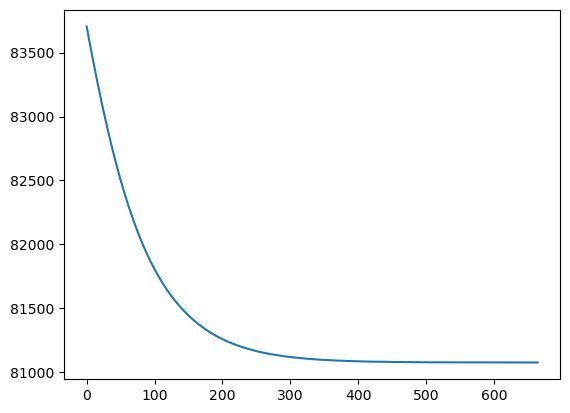

In [53]:
plt.plot(train_loss_l[50:], label='train')
# plt.plot(test_loss_l[50:], label='test')

In [29]:
file = open('model', 'rb')
model = pickle.load(file)
file.close()

In [12]:
file = open('model_undirected', 'rb')
model_undirected = pickle.load(file)
file.close()

In [15]:
len(model_undirected.edge_weight)

741

In [6]:
(38**2 + 38) /2


741.0

In [21]:
model.edge_weight

Parameter containing:
tensor([1.9519e-41, 1.9519e-41, 1.9519e-41,  ..., 1.9519e-41, 1.9519e-41,
        1.9519e-41], requires_grad=True)

In [54]:
x = model.edge_weight
m = torch.zeros((39, 39))

tril_indices = torch.tril_indices(row=39, col=39, offset=-1)
triu_indices = torch.triu_indices(row=39, col=39, offset=1)
m[triu_indices[0], triu_indices[1]] = x[:741]
m[tril_indices[0], tril_indices[1]] = x[741:]

In [51]:
len(x[741:])

741

In [20]:
m

tensor([[ 0.0000,  1.4528,  1.3907,  ...,  1.4542,  1.3883,  1.3875],
        [-3.0840,  0.0000,  1.1087,  ...,  1.1054,  1.1112,  1.0077],
        [-3.0444, -3.1403,  0.0000,  ..., -2.9051, -2.7570, -2.7979],
        ...,
        [ 1.1960,  1.1942,  1.3180,  ...,  0.0000, -3.1409, -3.1400],
        [ 3.4998, -3.3875, -3.3894,  ..., -3.3700,  0.0000, -3.1404],
        [ 3.2827,  3.2811, -3.2070,  ...,  3.2826,  3.2251,  0.0000]],
       grad_fn=<IndexPutBackward0>)

In [59]:
m1 = m.clone()
m1[m1.abs()<=1e-4] = 0
m1 

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.4073, 0.0000, 0.5439,  ..., 0.5488, 0.5494, 0.5484],
        [0.3927, 0.3941, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.9420, 0.9399, 0.9387,  ..., 0.0000, 0.4168, 0.3906],
        [0.1002, 0.0000, 0.0000,  ..., 0.0424, 0.0000, 0.4158],
        [0.4277, 0.4405, 0.4262,  ..., 0.4413, 0.4366, 0.0000]],
       grad_fn=<IndexPutBackward0>)

In [55]:
import pandas as pd

t_np = m.detach().numpy() #convert to Numpy array
df = pd.DataFrame(t_np) #convert to a dataframe
df.to_csv("model_final_edgeweights.csv",index=False) #save to file

In [58]:
df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.000000e+00,3.380936e-01,3.379887e-01,3.389341e-01,3.380899e-01,3.381739e-01,3.379431e-01,3.381668e-01,3.380589e-01,3.380114e-01,...,3.389804e-01,3.379148e-01,3.378848e-01,3.380631e-01,3.381649e-01,3.389567e-01,3.388908e-01,3.389931e-01,3.381746e-01,3.380238e-01
1,1.455787e+00,0.000000e+00,3.264789e-17,-2.276906e-17,-8.266973e-17,1.397577e-17,1.519550e-16,-7.741029e-17,-5.852152e-17,-2.564688e-16,...,-1.584123e-16,1.519494e-18,1.138338e-16,-5.539764e-17,-1.638700e-17,-4.994560e-17,-1.568154e-16,-1.660729e-16,-1.307816e-16,-9.889061e-17
2,1.455787e+00,1.455786e+00,0.000000e+00,1.081637e-16,-5.981408e-17,-1.112302e-16,-1.078852e-17,-9.367875e-17,1.010828e-16,-1.146344e-16,...,9.173442e-17,-6.492373e-17,-2.723410e-17,-9.754714e-17,7.342678e-17,1.116742e-16,-1.038701e-16,2.464274e-17,-1.117505e-16,1.003868e-16
3,1.455797e+00,1.455787e+00,1.455797e+00,0.000000e+00,-1.094153e-16,-1.431787e-18,-3.594433e-17,1.455652e+00,1.455694e+00,1.455698e+00,...,1.455695e+00,1.455652e+00,1.455697e+00,1.455698e+00,1.455699e+00,1.455658e+00,1.455654e+00,1.455654e+00,1.455652e+00,1.455696e+00
4,1.455797e+00,1.455798e+00,1.455788e+00,1.455786e+00,0.000000e+00,1.455697e+00,1.455655e+00,1.455656e+00,1.455654e+00,1.455695e+00,...,-1.081697e-16,8.487760e-17,-3.389900e-17,-1.039835e-16,-5.452874e-19,-1.056759e-16,4.571619e-17,-3.635393e-18,4.355314e-17,1.019608e-16
5,1.455787e+00,1.455787e+00,1.455796e+00,1.455796e+00,1.455787e+00,0.000000e+00,-8.883402e-17,-4.248173e-17,-1.100898e-16,2.120933e-17,...,-6.191731e-16,-4.854735e-17,-3.657205e-16,8.739392e-17,-6.127719e-16,1.739673e-16,-5.155946e-16,3.253659e-16,1.149268e-17,-1.700703e-16
6,1.455786e+00,1.455786e+00,1.455797e+00,1.455797e+00,3.489459e-01,3.501279e-01,0.000000e+00,1.953269e-16,-4.541706e-16,-1.084324e-15,...,3.383787e-01,3.383615e-01,3.382569e-01,3.384507e-01,3.391536e-01,3.380173e-01,3.382829e-01,3.383028e-01,3.381111e-01,3.384517e-01
7,3.502276e-01,3.495984e-01,3.502090e-01,3.501786e-01,3.489642e-01,3.501007e-01,3.501691e-01,0.000000e+00,3.380382e-01,3.392220e-01,...,4.746729e-17,7.934005e-17,8.515143e-17,-4.341651e-17,-3.603314e-17,-7.385548e-17,2.205330e-17,-8.145809e-17,-6.405159e-17,8.299182e-17
8,3.502460e-01,3.501448e-01,3.501879e-01,3.495324e-01,3.489222e-01,3.501304e-01,3.501818e-01,3.489332e-01,0.000000e+00,-6.436151e-17,...,-5.556559e-17,8.002156e-17,-3.439884e-17,8.730762e-17,-6.678595e-17,3.753920e-17,-7.485077e-17,-7.164270e-17,-1.260545e-16,-1.310180e-16
9,3.502010e-01,3.489465e-01,3.496193e-01,3.496123e-01,3.489270e-01,3.500915e-01,3.488952e-01,3.502184e-01,3.501343e-01,0.000000e+00,...,-1.335568e-16,1.272296e-16,-6.756040e-17,-8.143565e-17,1.223758e-16,-1.148016e-16,-2.181992e-17,-1.312996e-16,-1.349140e-16,-1.305739e-16


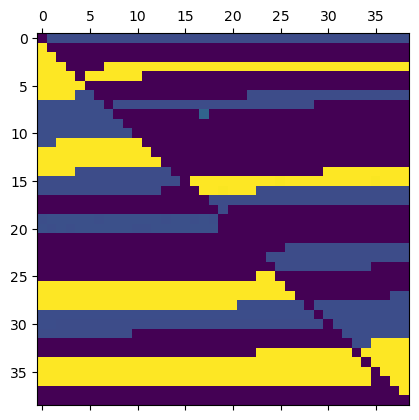

In [56]:
plt.matshow(df)

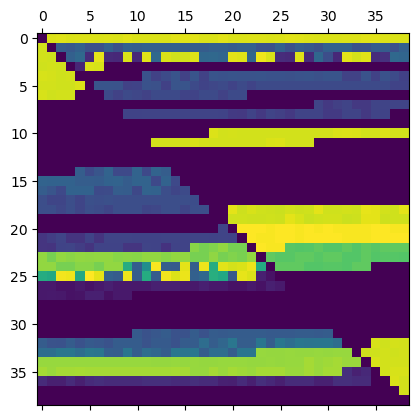

In [42]:
plt.matshow(df)

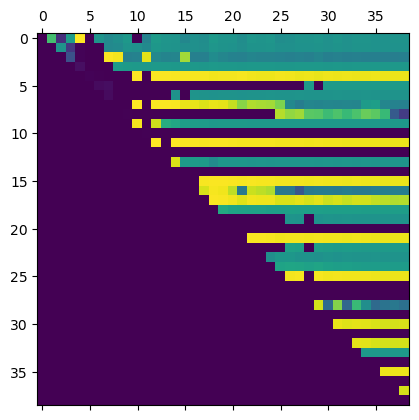

In [21]:
plt.matshow(df)

In [17]:
file = open('model_undirected', 'wb')
pickle.dump(model, file)
file.close()

NameError: name 'pd' is not defined